# Initial Imports

In [1]:
# Basics
import pandas as pd
import numpy as np

# PyViz
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# NLP
import nltk
import re
from mpl_toolkits.mplot3d import Axes3D
from textblob import TextBlob
import spacy
from nltk import word_tokenize

import sys

# Read Data

In [2]:
df_train = pd.read_csv('../Project-2/Final_ipynb/Resources/mbti_1.csv')
df_train.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


# Counting Occurrences

In [3]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)
  

# add features:
df_train['words_per_comment'] = df_train['posts'].apply(lambda x: len(x.split())/50.0)
df_train['variance_of_word_counts'] = df_train['posts'].apply(lambda x: var_row(x))

df_train['http_per_comment'] = df_train['posts'].apply(lambda x: x.count('http')/50.0)
df_train['img_per_comment'] = df_train['posts'].apply(lambda x: x.count('jpg')/50.0)

df_train['qm_per_comment'] = df_train['posts'].apply(lambda x: x.count('?')/50.0)
df_train['excl_per_comment'] = df_train['posts'].apply(lambda x: x.count('!')/50.0)
df_train['ellipsis_per_comment'] = df_train['posts'].apply(lambda x: x.count('...')/50.0)

df_train['E'] = df_train['type'].apply(lambda x: x.count('E'))
df_train['I'] = df_train['type'].apply(lambda x: x.count('I'))

df_train['S'] = df_train['type'].apply(lambda x: x.count('S'))
df_train['N'] = df_train['type'].apply(lambda x: x.count('N'))

df_train['F'] = df_train['type'].apply(lambda x: x.count('F'))
df_train['T'] = df_train['type'].apply(lambda x: x.count('T'))

df_train['P'] = df_train['type'].apply(lambda x: x.count('P'))
df_train['J'] = df_train['type'].apply(lambda x: x.count('J'))

df_train.head()

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.12,0.36,0.06,0.30,0,1,0,1,1,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.02,0.10,0.00,0.38,1,0,0,1,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.00,0.24,0.08,0.26,0,1,0,1,0,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.00,0.22,0.06,0.52,0,1,0,1,0,1,0,1
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.04,0.20,0.02,0.42,1,0,0,1,0,1,0,1


# Parts of Speech Functions 

In [4]:
# Note: running each function takes ~11 min each

def nouns_row(row):
  num_adjs = 0
  for i in row.split('|||'):
    i = nltk.re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", i)
    tags = nltk.pos_tag(i)
    for word,tag in tags:
      if tag == 'NN': 
        num_adjs += 1
  return num_adjs

def adjs_row(row):
  num_adjs = 0
  for i in row.split('|||'):
    i = nltk.re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", i)
    tags = nltk.pos_tag(i)
    for word,tag in tags:
      if tag == 'JJ': 
        num_adjs += 1
  return num_adjs


def verbs_row(row):
  num_adjs = 0
  for i in row.split('|||'):
    i = nltk.re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", i)
    tags = nltk.pos_tag(i)
    for word,tag in tags:
      valid = re.search(r"(VB[D|G|Z|P|N]*)", tag)
      if valid: 
        num_adjs += 1
  return num_adjs

def preps_row(row):
  num_adjs = 0
  for i in row.split('|||'):
    i = nltk.re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", i)
    tags = nltk.pos_tag(i)
    for word,tag in tags:
      if tag == ('PRP'): 
        num_adjs += 1
  return num_adjs

def interjections_row(row):
  num_adjs = 0
  for i in row.split('|||'):
    i = nltk.re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", i)
    tags = nltk.pos_tag(i)
    for word,tag in tags:
      if tag == ('UH'): 
        num_adjs += 1
  return num_adjs

def dets_row(row):
  num_adjs = 0
  for i in row.split('|||'):
    i = nltk.re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", i)
    tags = nltk.pos_tag(i)
    for word,tag in tags:
      if tag == ('DT'): 
        num_adjs += 1
  return num_adjs

df_train.head()

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.12,0.36,0.06,0.30,0,1,0,1,1,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.02,0.10,0.00,0.38,1,0,0,1,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.00,0.24,0.08,0.26,0,1,0,1,0,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.00,0.22,0.06,0.52,0,1,0,1,0,1,0,1
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.04,0.20,0.02,0.42,1,0,0,1,0,1,0,1


In [6]:
# ~11 min to run each
df_train['nouns_per_comment'] = df_train['posts'].apply(lambda x: nouns_row(x)/50.0)
df_train.head()

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,I,S,N,F,T,P,J,nouns_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.12,0.36,0.06,0.30,0,1,0,1,1,0,0,1,5.18
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.02,0.10,0.00,0.38,1,0,0,1,0,1,1,0,3.98
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.00,0.24,0.08,0.26,0,1,0,1,0,1,1,0,2.70
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.00,0.22,0.06,0.52,0,1,0,1,0,1,0,1,3.28
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.04,0.20,0.02,0.42,1,0,0,1,0,1,0,1,3.58


In [7]:
df_train['adjs_per_comment'] = df_train['posts'].apply(lambda x: adjs_row(x)/50.0)

In [8]:
df_train['verbs_per_comment'] = df_train['posts'].apply(lambda x: verbs_row(x)/50.0)

In [9]:
df_train['prepositions_per_comment'] = df_train['posts'].apply(lambda x: preps_row(x)/50.0)

In [10]:
df_train['interjections_per_comment'] = df_train['posts'].apply(lambda x: interjections_row(x)/50.0)

In [11]:
df_train['determiners_per_comment'] = df_train['posts'].apply(lambda x: dets_row(x)/50.0)
df_train.head()

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,...,F,T,P,J,nouns_per_comment,adjs_per_comment,verbs_per_comment,prepositions_per_comment,interjections_per_comment,determiners_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.12,0.36,0.06,0.30,0,...,1,0,0,1,5.18,1.62,1.72,0.54,0.00,1.06
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.02,0.10,0.00,0.38,1,...,0,1,1,0,3.98,2.12,4.68,2.72,0.04,1.84
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.00,0.24,0.08,0.26,0,...,0,1,1,0,2.70,1.68,3.10,1.32,0.08,1.10
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.00,0.22,0.06,0.52,0,...,0,1,0,1,3.28,1.80,4.14,1.88,0.04,1.86
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.04,0.20,0.02,0.42,1,...,0,1,0,1,3.58,1.80,4.42,1.78,0.06,1.60


# Sentiment Analysis

In [12]:
def clean_phrase(phrase):
  '''
  removes links and special characters using simple regex statements.
  '''
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", phrase).split())

def get_sentiment(phrase):
  """
  classifies text as positive, neutral, or negative using textblob's sentiment method
  """
  analysis = TextBlob(clean_phrase(phrase))
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'
                  
for index, row in df_train.iterrows():
  #if (index%1000) == 0:
    #print index
  #df_train.loc[index,'sentiment'] = get_sentiment(df_train.iloc[i]['posts'])
  df_train.loc[index,'sentiment'] = TextBlob(clean_phrase(df_train.iloc[index]['posts'])).sentiment.polarity

df_train.head()

,type,posts,words_per_comment,variance_of_word_counts,http_per_comment,img_per_comment,qm_per_comment,excl_per_comment,ellipsis_per_comment,E,...,T,P,J,nouns_per_comment,adjs_per_comment,verbs_per_comment,prepositions_per_comment,interjections_per_comment,determiners_per_comment,sentiment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900,0.48,0.12,0.36,0.06,0.30,0,...,0,0,1,5.18,1.62,1.72,0.54,0.00,1.06,0.166656
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756,0.20,0.02,0.10,0.00,0.38,1,...,1,1,0,3.98,2.12,4.68,2.72,0.04,1.84,0.104312
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900,0.10,0.00,0.24,0.08,0.26,0,...,1,1,0,2.70,1.68,3.10,1.32,0.08,1.10,0.145745
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324,0.04,0.00,0.22,0.06,0.52,0,...,1,0,1,3.28,1.80,4.14,1.88,0.04,1.86,0.131263
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576,0.12,0.04,0.20,0.02,0.42,1,...,1,0,1,3.58,1.80,4.42,1.78,0.06,1.60,0.075231


In [13]:
# Average sentiment
df_train['sentiment'].mean()

0.12118922894065216

/Users/devinaamangal/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/devinaamangal/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/devinaamangal/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/devinaamangal/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.4% of the points cannot be placed; you may

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

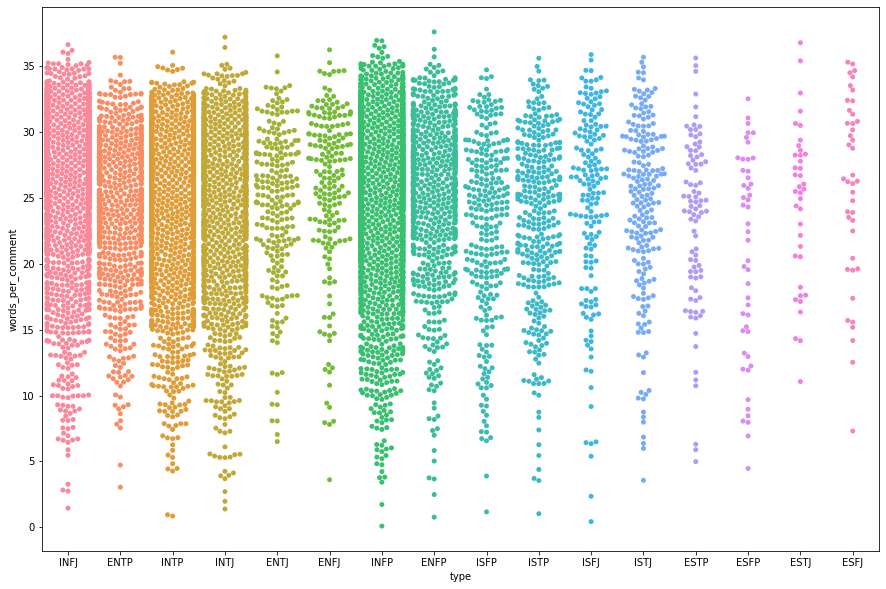

In [14]:
plt.figure(figsize=(15,10))
sns.swarmplot("type","words_per_comment", data=df_train)

In [15]:
df_train.to_csv(r'/Users/devinaamangal/Project2/Resources/df_train.csv', index = False)